<a href="https://colab.research.google.com/github/akshayxemo/Blood-Bank-Manager-Web/blob/master/K_Means_Evaluation_AKSHAY_KUMAR_DAS_Roll_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means Evaluation
> Evaluate the K-Means clustering implemented from scratch (done in previous assignment).
Use elbow method to determine the optimal number of clusters (using a suitable plot).
Determine the silhouette coefficient for the clustered data applying K-Means with optimal k value.

In [ ]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler

n = int(input("Enter Sample size : "))

Enter Sample size : 500


data points are: 
          X         Y
0 -1.413886 -1.560456
1  0.714447 -0.946833
2  1.901591  1.376699
3  0.155874  0.518282
4 -1.132928  0.374546



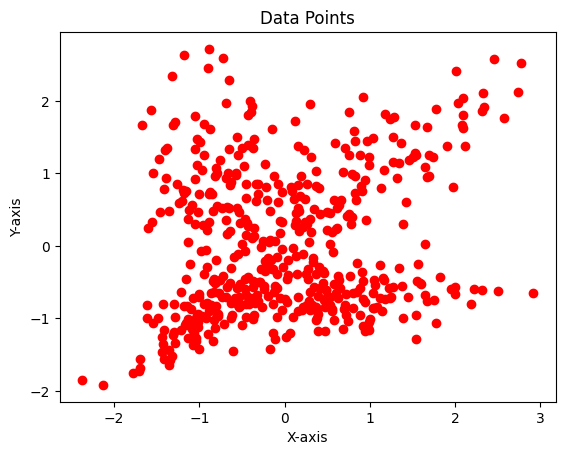

In [ ]:
# Get data points using make_classification method
x,y = make_classification(n_samples=n, n_features=2, n_informative=2, n_redundant=0, random_state=58)
df_x = pd.DataFrame(x)

# Preprocessing
x_scaler = StandardScaler().fit_transform(df_x)
x_scaler = pd.DataFrame(x_scaler)
x_scaler.columns = ["X", "Y"]
print(f"data points are: \n{x_scaler.head()}\n")

# plotting
plt.scatter(x_scaler["X"], x_scaler["Y"], c="red")
plt.title("Data Points")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.show()

# Methods to calculate K-Means

In [ ]:
# implementing K-Means Algorithm
def KMeans(data, K, plot_status):
  dataCentroid = data.sample(K)
  centroids, cluster = findingCluster(dataCentroid, data)
  if plot_status == "true":
    plotCluster(cluster, centroids, "Final K-Means Cluster")
    print(f"\nCluster points is \n {cluster.head()}\n\ncentroids :\n {centroids}")
  silhouette_score = calculate_silhouette_coefficient(cluster, centroids)
  print(f"Silhouette Score: {silhouette_score}")
  return calcWCSS(cluster, centroids), silhouette_score

In [ ]:
# calculating Euclidean Distance
def Euclidean_Dist(x1, x2, y1, y2):
  dist = math.sqrt((x2-x1)**2 + (y2-y1)**2)
  return dist

In [ ]:
def findingCluster(centroid, data):
  clusterCentroid = []
  df_temp = data

  # finding distance from each and every node from each centroids
  for i in df_temp.index:
    dist = []
    l = 0
    for j in centroid.index:
      dist.append((Euclidean_Dist(df_temp.iloc[i,0], centroid.iloc[l]["X"], df_temp.iloc[i,1], centroid.iloc[l]["Y"]), j))
      l = l + 1
    # find which centroid is the closest from current point and append it to the cluster classification centroid for understand which cluster it belongs to
    clusterCentroid.append(getClosestCentroid(dist))

  # add the classes to all the data based on which centroid is nearest
  df_temp["class"] = clusterCentroid

  # Calculating New centroids
  new_centroids = newCenntroids(centroid, df_temp)

  # if previous centroids and new centroids dont match then recall this same function with new centroids
  if not centroid.equals(new_centroids):
    new_centroids, df_temp = findingCluster(new_centroids, df_temp)

  return new_centroids, df_temp

In [ ]:
def getClosestCentroid(Distlist):
  min = Distlist[0]
  for i in range(len(Distlist)):
    if(Distlist[i][0] <= min[0]):
      min = Distlist[i]
  return min[1]

In [ ]:
def newCenntroids(df, df_temp):
  centroid = []
  for i in df.index:
    # take first cluster based on the class
    cluster = df_temp.loc[df_temp['class'] == i]
    x = 0
    y = 0
    # summing up all the X and Y values
    for j in range(len(cluster)):
      x += cluster.iloc[j,0]
      y += cluster.iloc[j,1]
    # finding the mean of X and Y to get the new centroid point
    x = x / len(cluster)
    y = y / len(cluster)
    # append the new centroid to the centroid list
    centroid.append([x,y])
  # returning the centroid list as a data frame
  return pd.DataFrame(centroid, columns = ["X", "Y"])

In [ ]:
def plotCluster(dataFrame, centroids, title):
  plt.scatter(dataFrame.iloc[:,0], dataFrame.iloc[:,1], c = dataFrame.iloc[:,2])
  plt.scatter(centroids.iloc[:,0], centroids.iloc[:,1], c = "red") #plotting centroids along with the clusters
  plt.title(title)
  plt.xlabel("X-axis")
  plt.ylabel("Y-axis")
  plt.show()

## Method to calculate WCSS
> WCSS is calculated by getting sums of squred distances between cluster centroid and each points in that cluster for each cluster and sum them up.

In [ ]:
def calcWCSS(clusters, centroids):
  WCSS = 0
  for i in centroids.index:
    dist = 0
    df_cluster = clusters[clusters["class"] == i]

    # get distance from each point in that cluster
    for j in range(len(df_cluster)):
      dist += Euclidean_Dist(df_cluster.iloc[j,0], centroids.iloc[i,0], df_cluster.iloc[j,1], centroids.iloc[i,1])

    WCSS += dist

  return math.floor(WCSS)

# Evaluate the WCSS for each K clusters and plotting the Elbow graph to determine the optimal k

Silhouette Score: -1.0
630
Silhouette Score: 0.3004881963659098
487
Silhouette Score: 0.4403056996927966
404
Silhouette Score: 0.4687490358192684
316
Silhouette Score: 0.2791996627305124
279
Silhouette Score: 0.3384577446391395
253
Silhouette Score: 0.27131593887665606
236
Silhouette Score: 0.3081012717734396
228
Silhouette Score: 0.31493423204147025
203
Silhouette Score: 0.2561986827209431
196


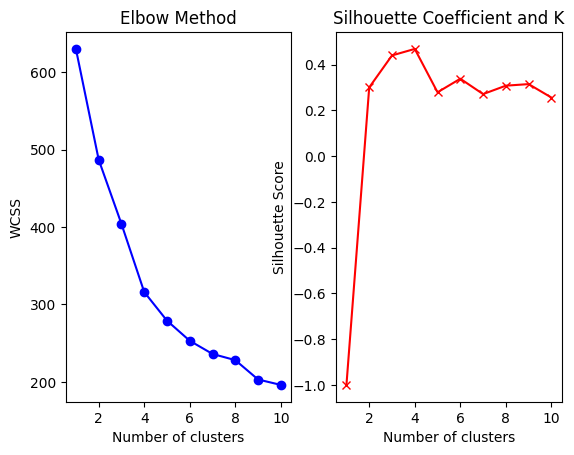

In [ ]:
wcss_k_val=[]
wcss = []
silhouetteList = []
K = range(1, 11)
for i in K:
  WCSS, silhouette_score = KMeans(x_scaler, i, "false")
  print(WCSS)
  wcss.append(WCSS)
  silhouetteList.append(silhouette_score)

plt.subplot(1,2,1)
plt.plot(K, wcss, '-bo')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

plt.subplot(1,2,2)
plt.plot(K, silhouetteList, '-rx')
plt.title('Silhouette Coefficient and K')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')

plt.show()

> In the above graph we can see that the `optimal K is 4` in our case from which the value is almost linearly decreasing

# Determine the silhouette coefficient for the clustered data applying K-Means with optimal k value.

In [ ]:
# silhouette score calculation
def calculate_silhouette_coefficient(clusters, centroids):
  Silhouette_score = 0

  for i in centroids.index:
    df_cluster = clusters[clusters["class"] == i]

    for j in range(len(df_cluster)):
      point1 = df_cluster.iloc[j,:]

      # Avg inter cluster distance for point 1
      interDist = 0
      for n in range(len(df_cluster)):
        point2 = df_cluster.iloc[n,:]
        if not point1.equals(point2):
          interDist += Euclidean_Dist(point1['X'], point2['X'], point1['Y'], point2['Y'])
      avgInterDist = (interDist / (len(df_cluster)-1))
      # print(f"avg {avgInterDist} for point \n{point1}")

      # Avg intra distance for point 1
      minIntraDist = 0
      for k in centroids.index:
        if k != i:
          # print(f"\nCluster {i} centroid {k}\n\n")
          df_cluster_intra = clusters[clusters["class"] == k]

          # for each cluster other than its own Avg distance / intra distance and finding minimum of them
          intraDist = 0
          for kn in range(len(df_cluster_intra)):
            intraDist += Euclidean_Dist(point1['X'], df_cluster_intra.iloc[k,0], point1['Y'], df_cluster_intra.iloc[k,1])
          avgIntraDist = (intraDist / (len(df_cluster_intra)-1))
          # finding nearest cluster intra distance
          if minIntraDist == 0:
            minIntraDist = avgIntraDist
          else:
            minIntraDist = min(avgIntraDist, minIntraDist)
          # print(f"{point1} cluster : {k}, {i}, Min = {minIntraDist}, {avgInterDist}")

      # Calculating the silhouette coefficient for point 1
      silhouette_cof = (minIntraDist - avgInterDist) / max(avgInterDist, minIntraDist)
      Silhouette_score += silhouette_cof
  Silhouette_score /= len(clusters)
  return Silhouette_score

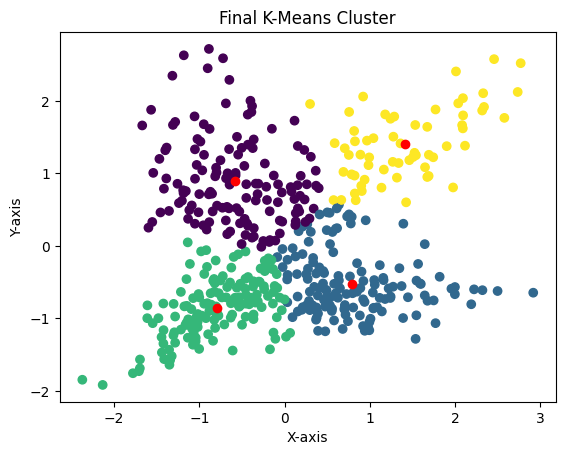


Cluster points is 
           X         Y  class
0 -1.413886 -1.560456      2
1  0.714447 -0.946833      1
2  1.901591  1.376699      3
3  0.155874  0.518282      0
4 -1.132928  0.374546      0

centroids :
           X         Y
0 -0.578717  0.896479
1  0.786583 -0.519205
2 -0.794805 -0.854124
3  1.416998  1.405259
Silhouette Score: 0.22933699504748808


In [ ]:
WCSS = KMeans(x_scaler, 4, "true")